## Моделювання броунівського руху

1. Змоделювати броунівський рух за допомогою:
 a. Алгоритму 3.
 b. За допомогою розкладу в $L_2[0,1]$ за функціями Хаара.
 c. За методом Вінера.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1981)

Алгоритм 3:
1. Моделюємо $B_{k/2^n}$ в точках $\pi_n = \{k/2^n, 0 \leq k \leq 2^n\}$.
2. Розглянемо розширену сітку, $\pi_{n+1}$. На ній визначимо $B_t$ так:
  - $B_{l/2^{n+1}} = B_{k/2^n}$, якщо $l = 2k$,
  - $B_{l/2^{n+1}} = (B_{k/2^n} + B_{(k+1)/2^n})/2+N(0,1/2^{n+2})$, якщо $l = 2k+1$.

In [2]:
def generate_brownian(n, x0=0):
    m = 2 ** n
    delta = 1 / m
    increments = np.random.normal(loc=0, scale=np.sqrt(delta), size=m)
    trajectory = x0 + np.cumsum(np.append(0, increments))
    return trajectory

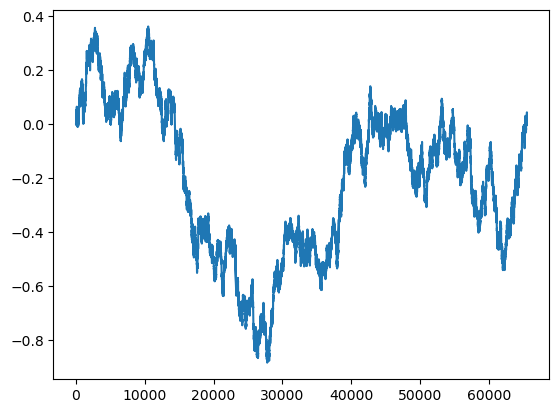

In [3]:
n = 16
x = generate_brownian(n)
plt.plot(x)

In [4]:
len(x)

65537

In [10]:
def algorithm_3(n, x0=0):
    x_n = generate_brownian(n, x0)
    x_return = np.empty((2 ** (n + 1) + 1, ))
    x_return[::2] = x_n
    x_return[1::2] = (x_n[:-1] + x_n[1:]) * 0.5 + np.random.normal(loc=0, scale=np.sqrt(1 / (2 ** (n + 2))), size=len(x_return[1::2]))
    return x_return

In [11]:
np.random.seed(0)

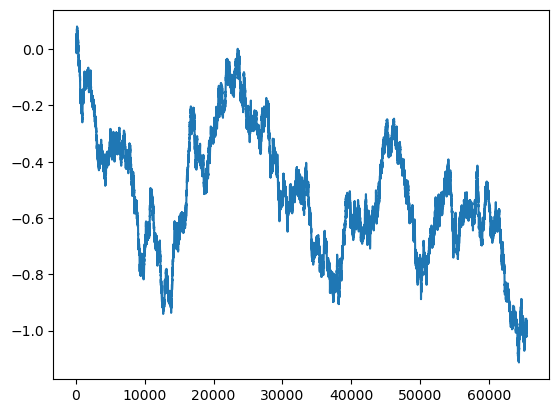

In [12]:
plt.plot(generate_brownian(n))

In [13]:
np.random.seed(0)

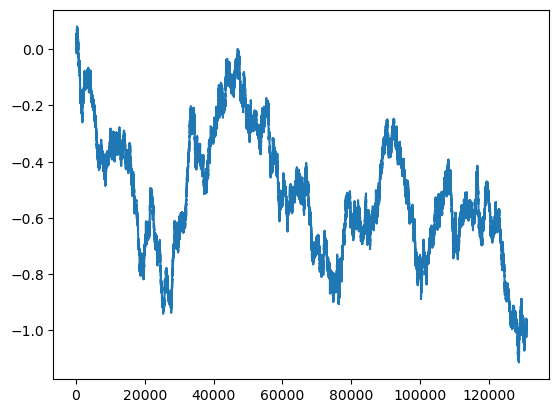

In [14]:
plt.plot(algorithm_3(n))

Other:

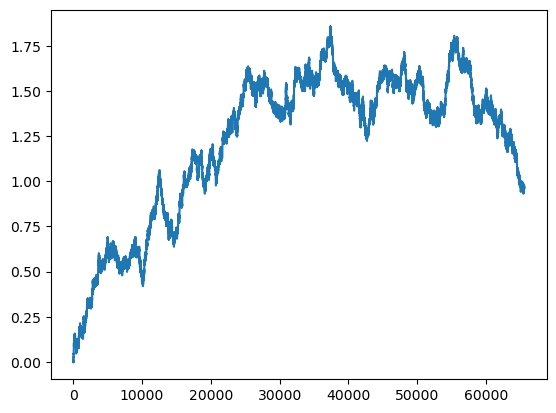

In [15]:
plt.plot(generate_brownian(n))

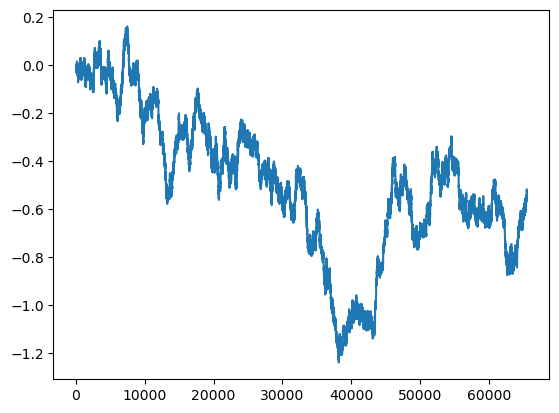

In [9]:
plt.plot(generate_brownian(n))

Розклад в $L_2[0,1]$ за функціями Хаара $\{\phi_k\}$:
$W_t^n = \sum_{k = 0}^{n-1} \xi_k <\phi_k, 1_{[0,t]}>_{L_2[0,1]}$, $\{\xi_j\}_j$ -- н.о.р. з стд. норм. розподілом.
Можна довести, що $W_t^n \to^{L_2(P)} W_t$ при $n \to +\infty$.

$\phi_{2^j + k}(t) = 2^j (1_{[2k/2^{j+1}, (2k+1)/2^{j+1})}(t) - 1_{[(2k+1)/2^{j+1}, (2k+2)/2^{j+1})}(t))$, $0 \leq k \leq 2^j - 1$

In [10]:
def int_haara_func(j, n, u):
    d = 2 ** n

    l1 = (-d + 2 * j) / d
    l2 = (-d + 2 * j + 1) / d
    l3 = (-d + 2 * j + 2) / d

    i1 = (l1 <= u) and (u < l2)
    i2 = (l2 <= u) and (u < l3)
    i3 = (l3 < u)

    mult = 2 ** ((n - 1) / 2)

    if i1:
        return mult * (u - l1)
    elif i2:
        return mult * (l2 - l1) - mult * (u - l2)
    elif i3:
        return mult * (l2 - l1) - mult * (l3 - l2)

    return 0

In [11]:
def haara_method(n):
    m = 2 ** n
    xi = np.random.normal(loc=0, scale=1, size=m)
    def to_return(t):
        phik = []
        for k in np.arange(1, n+1):
            if k == 1:
                delta = 2
            else:
                delta = 2 ** k - 2 ** (k - 1)

            for j in np.arange(0, delta):
                phik.append(int_haara_func(j=2 ** (k-1) + j, n=k, u=t))

        phik = np.array(phik)
        return np.sum(xi * phik)
    return to_return

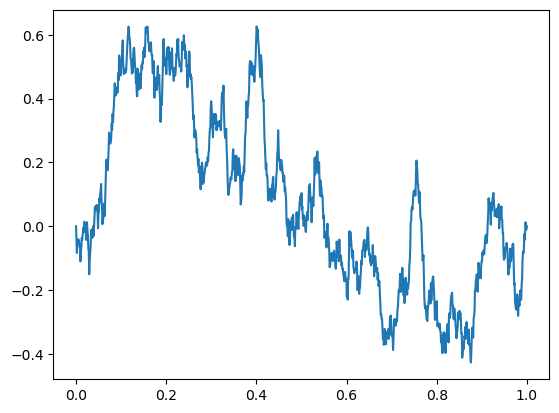

In [12]:
n = 10
m = 2 ** n
haara_method_func = haara_method(10)
haara_method_traj = list()
times = (np.arange(0, m+1) / m)
for j, tk in enumerate(times):
    haara_method_traj.append(haara_method_func(tk))
plt.plot(times, haara_method_traj)

Метод Вінера:
$W_t^n = t\xi_0 + \sqrt{2} \cdot \sum_{j = 1}^n \frac{\sin(tn\pi)}{n\pi}\xi_n$, $\{\xi_j\}_j$ -- н.о.р. з стд. норм. розподілом.
Відомо, що $W_t^n \to^{L_2(P)} W_t$ при $n \to +\infty$.

In [13]:
def phi(t, n):
    return 2 ** 0.5 * np.sin(t * n * np.pi) / (n * np.pi)

def wiener_method(n):
    xi0 = np.random.normal(loc=0, scale=1, size=(1,))
    xi = np.random.normal(loc=0, scale=1, size=(n-1,))
    def to_return(t):
        phi_vals = phi(t, np.arange(1, n))
        result = t * xi0 + np.sum(xi * phi_vals)
        return result
    return to_return

In [14]:
def test(n=5000):
    wiener_method_func = wiener_method(n)
    wiener_method_traj = list()
    times = (np.arange(0, n+1) / n)
    for tk in times:
        wiener_method_traj.append(wiener_method_func(tk))
    plt.plot(times, wiener_method_traj)

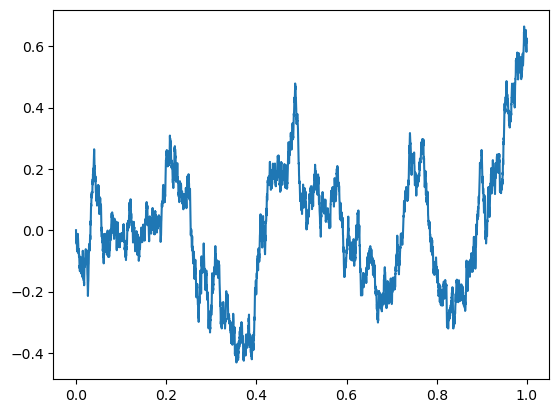

In [15]:
test()

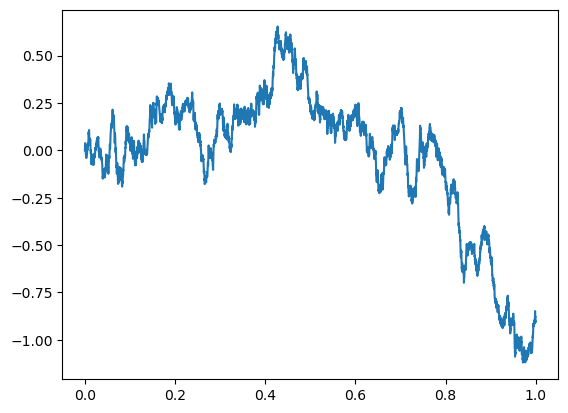

In [16]:
test()

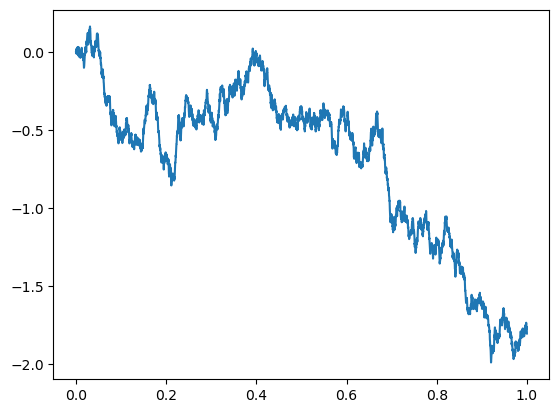

In [17]:
test()

2. За формулою Іто, довести формулу Лейбніца за умови, що $g(t)$ -- невипадкова функція, $h(t)$ -- випадковий процес:
$d(g(t)h(t)) = g(t)dh(t) + g(t)df(t)$

Розглянемо функцію вигляду: $f(t,x) = g(t)x$. Навіть за кілометр видно, що вона задовольняє умови теореми Іто (якщо $g(t)$ гладка). Застосуємо формулу Іто для процесу $h(t)$ та функції $f(t,x)$:

$\partial_t f(t,x) = g'(t)x$, $\partial_x f(t,x) = g(t)$, $\partial_{xx} f(t,x) = 0$

$df(t,h(t)) = d(g(t)h(t)) = \partial_t f(t,h(t)) dt + \partial_x f(t,h(t)) dh(t) + 0.5 \cdot \partial_{xx} f(t,h(t)) (dh(t))^2 =$

$= g'(t)h(t)dt + g(t)dh(t) = h(t)dg(t) + g(t)dh(t)$

Твердження довести вдалося.